### Import library

In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Read the CSV file

In [77]:
df = pd.read_csv("df_total.csv")

### Understand the dimensions, features and check for missing values

In [78]:
print(df.isna().sum())
print(df.shape)
print(df.info())
print(list(df.columns))
print(df.describe())

date               0
cases_new          0
cases_recovered    0
cases_active       0
checkin            0
close_contact      0
rtk-ag             0
pcr                0
daily              0
daily_booster      0
cumul_full         0
cumul_booster      0
dtype: int64
(266, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             266 non-null    object
 1   cases_new        266 non-null    int64 
 2   cases_recovered  266 non-null    int64 
 3   cases_active     266 non-null    int64 
 4   checkin          266 non-null    int64 
 5   close_contact    266 non-null    int64 
 6   rtk-ag           266 non-null    int64 
 7   pcr              266 non-null    int64 
 8   daily            266 non-null    int64 
 9   daily_booster    266 non-null    int64 
 10  cumul_full       266 non-null    int64 
 11  cumul_booster    266 non-null 

### Select independent variables and dependent variables 

In [79]:
X = df.iloc[:, 2:].values
y = df['cases_new'].values

### Splitting the dataset into training set and testing set

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the mutliple linear regression in the training set

In [81]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict the test set results

In [82]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

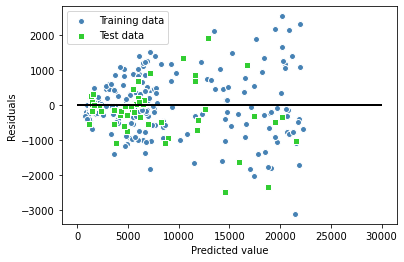

In [83]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

In [87]:
print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


### Ridge Regresssion

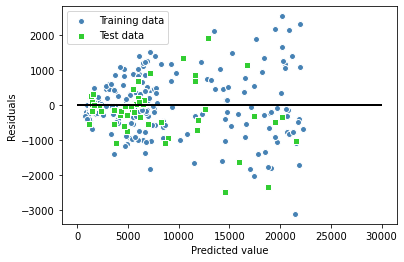

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


In [88]:
rr = Ridge(alpha=0.5)
rr.fit(X_train, y_train)

y_train_rr = rr.predict(X_train)
y_test_rr = rr.predict(X_test)

plt.scatter(y_train_rr, y_train_rr - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_rr, y_test_rr - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_rr)), np.sqrt(mean_squared_error(y_test, y_test_rr))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_rr), r2_score(y_test, y_test_rr)))

### Lasso Regression

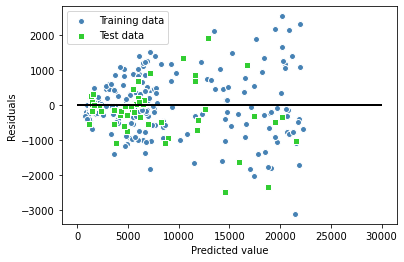

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


In [89]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)

plt.scatter(y_train_lasso, y_train_lasso - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_lasso, y_test_lasso - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_lasso)), np.sqrt(mean_squared_error(y_test, y_test_lasso))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_lasso), r2_score(y_test, y_test_lasso)))

### ElasticNet Regression

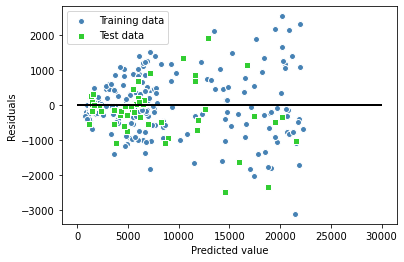

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


In [90]:
enet = ElasticNet(alpha=0.5)
enet.fit(X_train, y_train)

y_train_enet = lasso.predict(X_train)
y_test_enet= lasso.predict(X_test)

plt.scatter(y_train_enet, y_train_enet - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_enet, y_test_enet - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_enet)), np.sqrt(mean_squared_error(y_test, y_test_enet))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_enet), r2_score(y_test, y_test_enet)))